In [3]:
# Near Earth Orbit

# NASA - Near Earth Orbit (NEO)
### Sulchan Yoon

### Source: https://api.nasa.gov/

###

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report as classReport
from yellowbrick.classifier import ConfusionMatrix as CM
from sklearn.metrics import precision_recall_fscore_support as score

In [5]:
# Load initial dataset
data = pd.read_csv("NEO.csv")

## EDA
#### This dataset contains 10 columns:

- id: The unique identifier of the object
- name: Name of the object by NASA
- est_diameter_min: Value of the estimated diameter of the object's minimum value
- est_diameter_max: Value of the estimated diameter of the object's maximum value
- relative_velocity: Estimated relative velocity of the object to Earth
- miss_distance: Distance at the closest point on Earth in KM
- orbiting_body: The body the object is actually under orbit
- sentry_object: Is it included in sentry
- absolute_magnitude: Intrinsic luminosity
- hazardous: Defined to be hazardous

In [6]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
hazard = data["hazardous"].value_counts().reset_index()
boolReplace = {True:"Hazardous", False:"Safe"}
hazard = hazard.replace(boolReplace)
hazard.head()

,hazardous,count
0,Safe,81996
1,Hazardous,8840


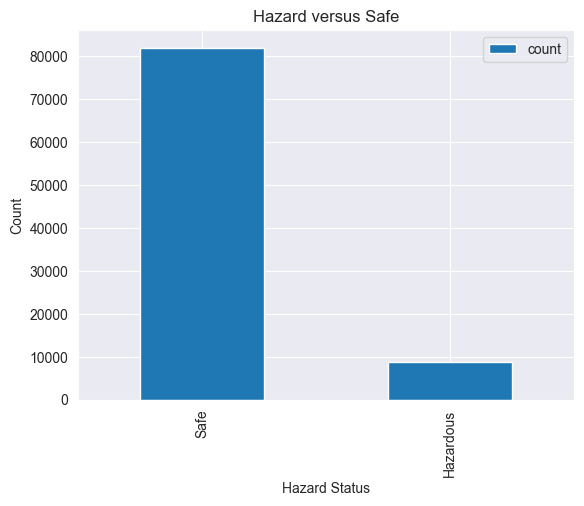

In [10]:
hazard.plot(kind = "bar", x = "hazardous", y = "count")
plt.xlabel("Hazard Status")
plt.ylabel("Count")
plt.title("Hazard versus Safe")
plt.show()

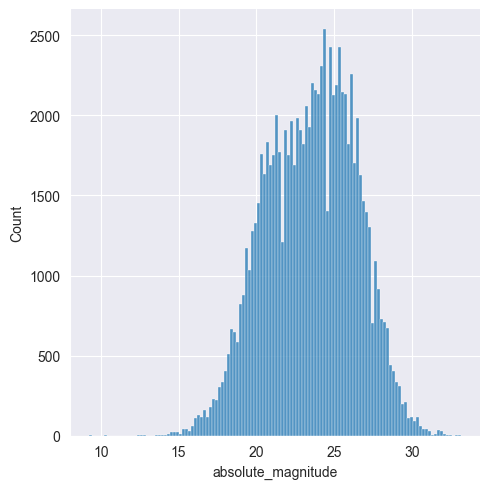

In [11]:
sns.displot(data["absolute_magnitude"])
plt.show()

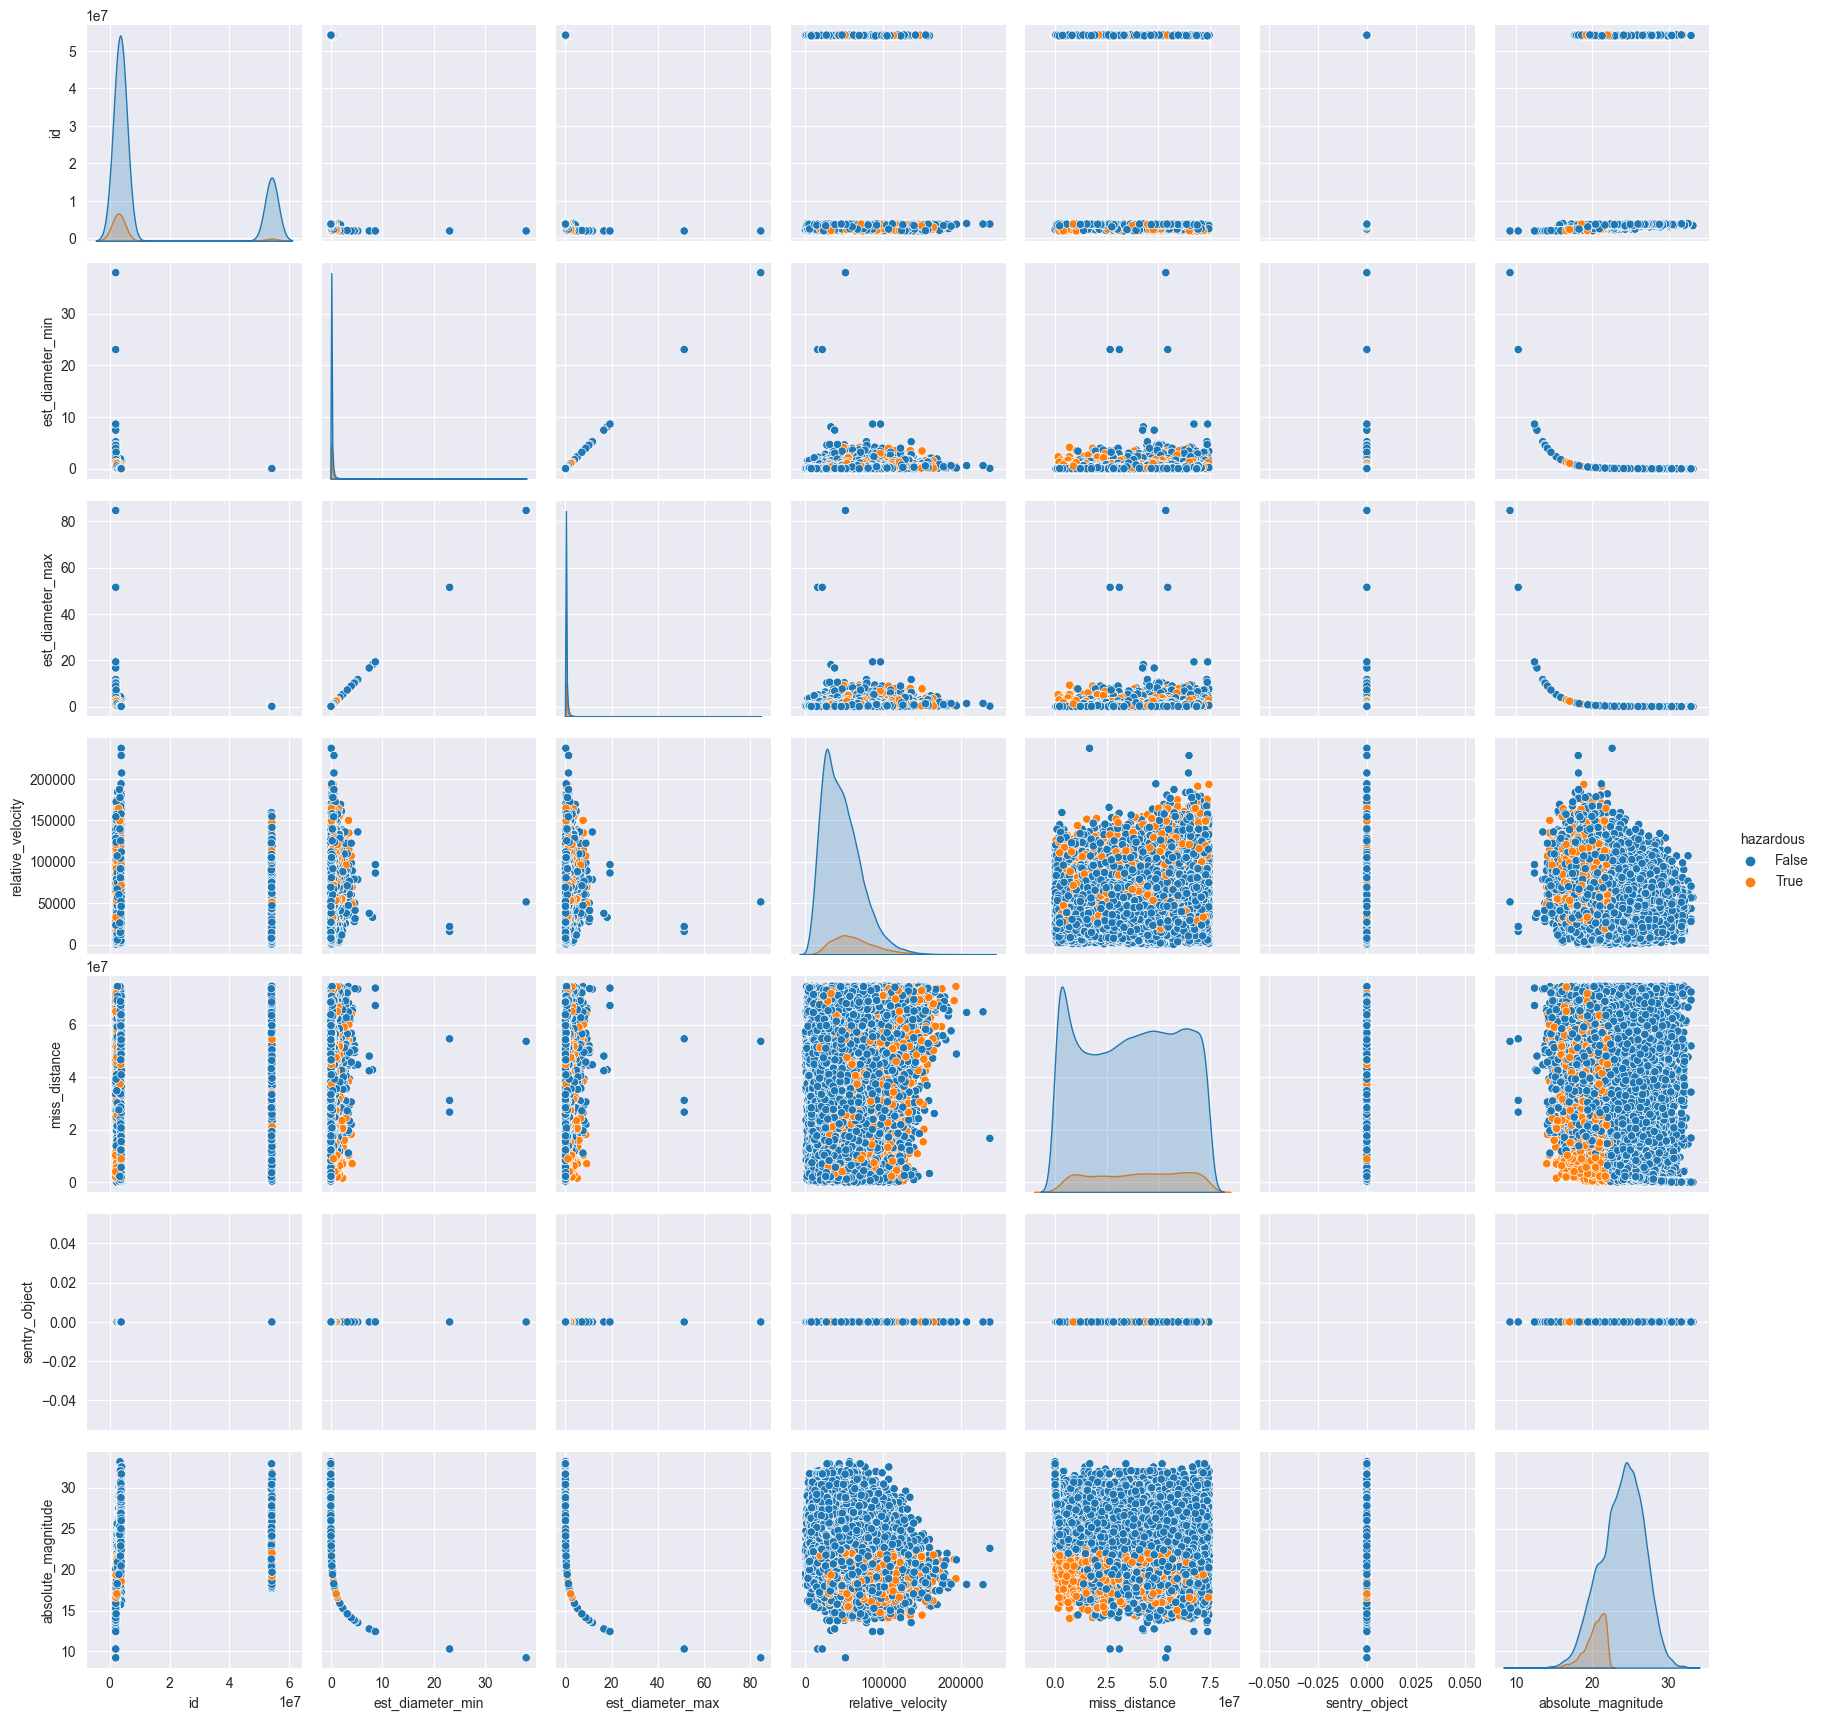

In [12]:
sns.pairplot(data, hue = "hazardous")

In [13]:
X = data.drop(['id', 'name', 'orbiting_body', 'sentry_object', 'hazardous'], axis = 1)
Y = data.loc[:, 'hazardous']
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
x_train.shape, y_train.shape

((68127, 5), (68127,))

In [15]:
x_test.shape, y_test.shape

((22709, 5), (22709,))

In [16]:
logisticRegr.fit(x_test, y_test)

LogisticRegression()

In [17]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [18]:
logisticRegr.score(x_test,y_test)

0.901977189660487

In [19]:
logPred = logisticRegr.predict(x_test)
print(logPred)

[0 0 0 ... 0 0 0]


In [20]:
logReport = classReport(y_test, logPred, zero_division = 0)
print(logReport)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20483
           1       0.00      0.00      0.00      2226

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.86     22709



In [21]:
from sklearn.metrics import mean_squared_error
print("MSE Test: ", mean_squared_error(y_true = y_test, y_pred = logisticRegr.predict(x_test)))
print("MSE Train: ", mean_squared_error(y_true = y_train, y_pred = logisticRegr.predict(x_train)))

MSE Test:  0.09802281033951298
MSE Train:  0.09708338837758891


In [22]:
logisticRegr.score(x_test, y_test)

0.901977189660487

(array([20483.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

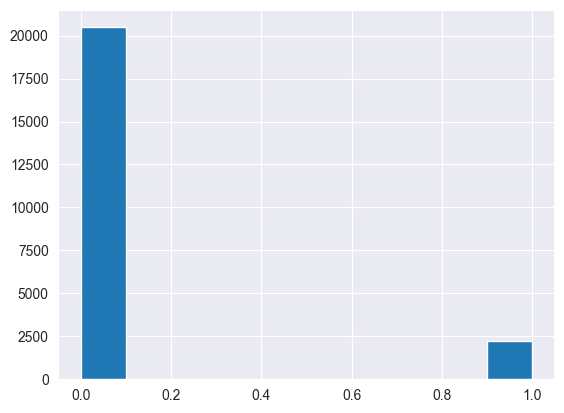

In [23]:
plt.hist(y_test - logPred)

In [24]:
from sklearn.metrics import mean_absolute_error
print("MAE Test: ", mean_absolute_error(y_true = y_test, y_pred = logisticRegr.predict(x_test)))
print("MAE Train: ", mean_absolute_error(y_true = y_train, y_pred = logisticRegr.predict(x_train)))

MAE Test:  0.09802281033951298
MAE Train:  0.09708338837758891


Confusion Matrix Score:  90.2


C:\Users\sulch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


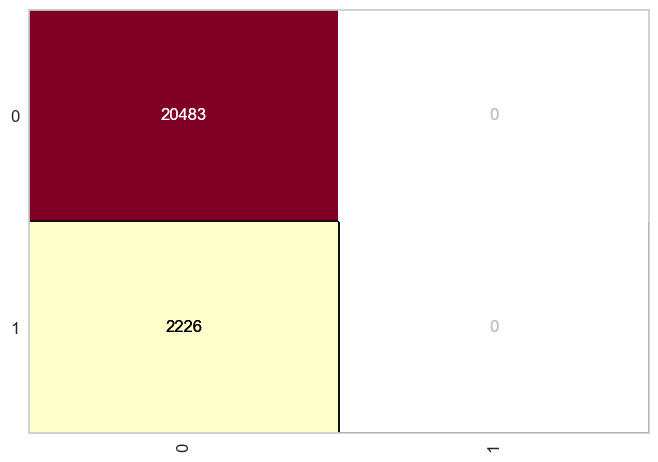

In [29]:
cmLogR = CM(logisticRegr)
cmLogR.fit(x_train,y_train)
cmLogR.score(x_test,y_test)
scoreCMLogR = round(cmLogR.score(x_test,y_test)*100,2)
print("Confusion Matrix Score: ", scoreCMLogR)

Due to an imbalance of the boolean, we will look to use oversampling to reprocess the modeling with a more balanced sample

In [33]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
xROS,yROS = ROS.fit_resample(X,Y)
xROS_train, xROS_test, yROS_train, yROS_test = train_test_split(xROS,yROS, test_size=0.25, random_state=0)
logisticRegrROS = LogisticRegression()
xROS_train.shape, yROS_train.shape

((122994, 5), (122994,))

In [34]:
logisticRegrROS.fit(xROS_test, yROS_test)
logisticRegrROS.fit(xROS_test, yROS_test)
logisticRegrROS.fit(xROS_test, yROS_test)

LogisticRegression()

In [35]:
logROSPred = logisticRegrROS.predict(xROS_test)
print(logROSPred)
logROSReport = classReport(yROS_test, logROSPred, zero_division = 0)
print(logROSReport)

[0 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45     20295
           1       0.55      0.79      0.65     20703

    accuracy                           0.57     40998
   macro avg       0.59      0.57      0.55     40998
weighted avg       0.59      0.57      0.55     40998



Confusion Matrix Score:  57.31


C:\Users\sulch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


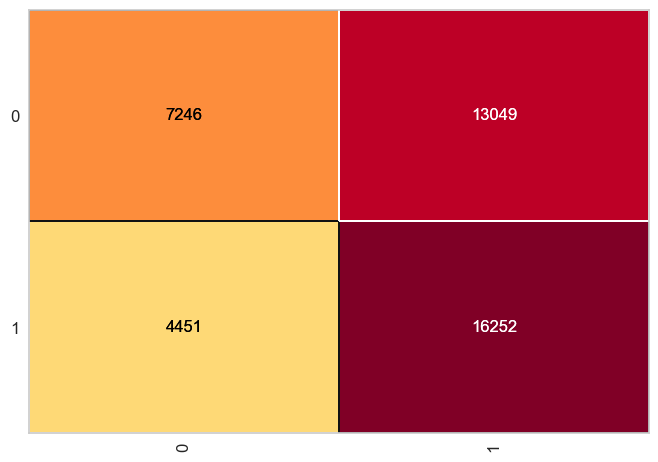

In [36]:
cmLogROS = CM(logisticRegrROS)
cmLogROS.fit(xROS_train,yROS_train)
cmLogROS.score(xROS_test,yROS_test)
scoreCMLogROS = round(cmLogROS.score(xROS_test,yROS_test)*100,2)
print("Confusion Matrix Score: ", scoreCMLogROS)